In [98]:
# Libraries

import matplotlib.pyplot as plt
import matplotlib.figure as figure
import numpy as np
import pandas as pd
import seaborn as sns

In [101]:
# Data

df = pd.read_csv('covid.csv',parse_dates=['date'],index_col=['date'])
df.dropna(axis=0, how='all', inplace=True)
df.fillna('0 new cases',inplace=True)
df

,McKinleyCountyM,BernalilloCountyM,BernalilloCountyS,McKinleyCountyS
date,,,,
2020-05-03,28 new cases in McKinley County,37 new cases in Bernalillo County,0 new cases,0 new cases
2020-04-29,133 new cases in McKinley County,27 new cases in Bernalillo County,0 new cases,0 new cases
2020-05-02,53 new cases in McKinley County,53 new cases in Bernalillo County,0 new cases,0 new cases
2020-04-30,74 new cases in McKinley County,48 new cases in Bernalillo County,0 new cases,0 new cases
2020-05-04,89 new cases in McKinley County,24 new cases in Bernalillo County,0 new cases,0 new cases
2020-04-22,59 new cases in McKinley County,15 new cases in Bernalillo County,0 new cases,0 new cases
2020-04-23,54 new cases in McKinley County,31 new cases in Bernalillo County,0 new cases,0 new cases
2020-04-25,69 new cases in McKinley County,19 new cases in Bernalillo County,0 new cases,0 new cases
2020-04-26,12 new cases in McKinley County,18 new cases in Bernalillo County,0 new cases,0 new cases


In [102]:
# grab dates with multiple new cases (M) and single new cases (S)
# convert to strings to strip out all but numbers, total up cases in new column
df['BernalilloM'] = df['BernalilloCountyM'].astype(str)
df['BernalilloS'] = df['BernalilloCountyS'].astype(str)
df['BernalilloM'] = df['BernalilloM'].str.extract(r'(\d+)', expand=False).astype(int)
df['BernalilloS'] = df['BernalilloS'].str.extract(r'(\d+)', expand=False).astype(int)
bern_sum = df['BernalilloM'] + df['BernalilloS']
df['Bernalillo'] = bern_sum

df['McKinleyM'] = df['McKinleyCountyM'].astype(str)
df['McKinleyS'] = df['McKinleyCountyS'].astype(str)
df['McKinleyM'] = df['McKinleyCountyM'].str.extract(r'(\d+)', expand=False).astype(int)
df['McKinleyS'] = df['McKinleyCountyS'].str.extract(r'(\d+)', expand=False).astype(int)
mckinley_sum = df['McKinleyM'] + df['McKinleyS']
df['McKinley'] = mckinley_sum

# drop unused columns
df = df.drop('BernalilloCountyM',1)
df = df.drop('BernalilloCountyS',1)
df = df.drop('BernalilloM',1)
df = df.drop('BernalilloS',1)

df = df.drop('McKinleyCountyM',1)
df = df.drop('McKinleyCountyS',1)
df = df.drop('McKinleyM',1)
df = df.drop('McKinleyS',1)

df

# TODO
# 1 - Do the above for all other NM counties
# 2 - Calculate rolling 7-day average and graph that vs. daily new cases

,Bernalillo,McKinley
date,,
2020-05-03,37,28
2020-04-29,27,133
2020-05-02,53,53
2020-04-30,48,74
2020-05-04,24,89
2020-04-22,15,59
2020-04-23,31,54
2020-04-25,19,69
2020-04-26,18,12


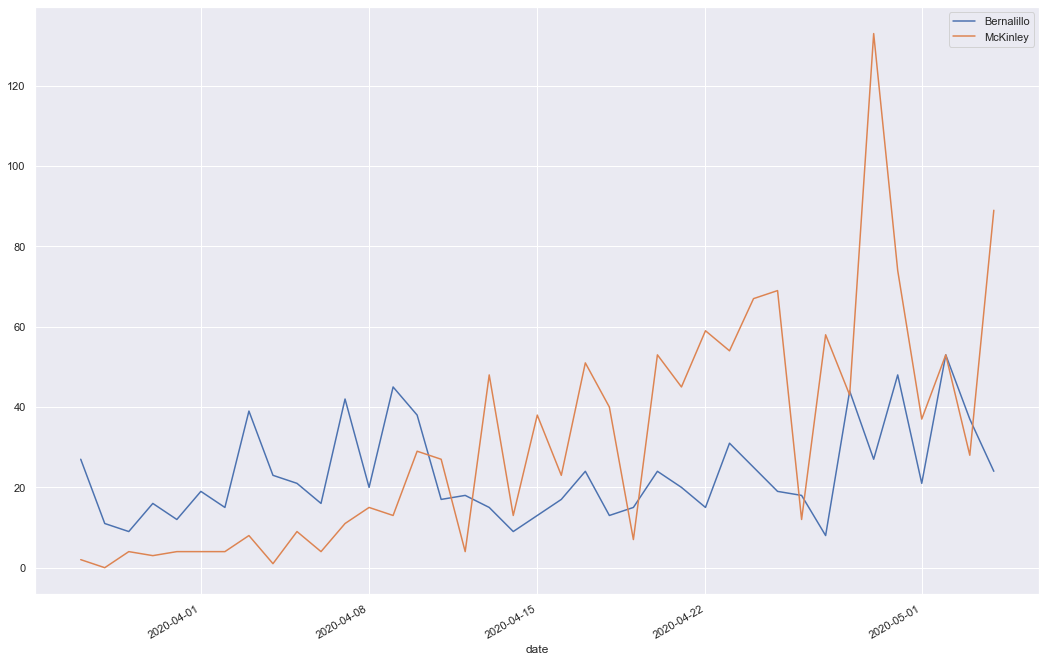

In [103]:
sns.set(style="darkgrid")
df.plot(figsize=(18,12))